In [1]:
import os
import cv2 
import matplotlib.pyplot as plt


cardigans : 299
men_trousers : 600
women_sweaters : 300
polo_shirts : 9
women_coats : 300
women_pants : 298
tanks : 9
dresses : 299
women_tshirts : 299
men_sweaters : 300
men_coats : 16


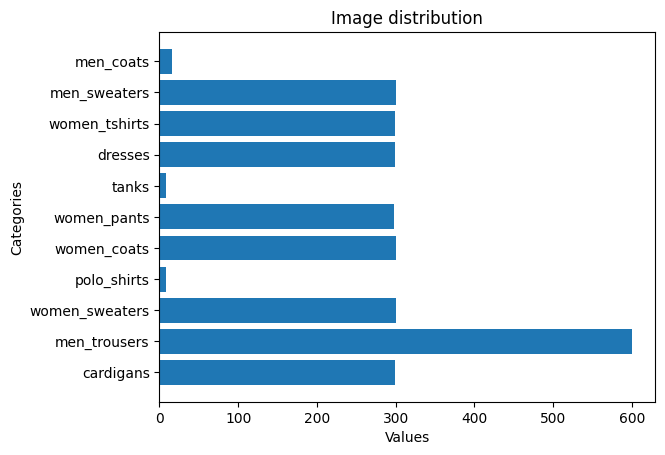

In [2]:
img_dir = "/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET"
cats = []
n_imgs = []
for category in os.listdir(img_dir):
    if category != ".DS_Store":
        cats.append(category)
        n_img = len(os.listdir(os.path.join(img_dir, category)))
        print(f"{category} : {n_img}")
        n_imgs.append(n_img)

plt.barh(cats, n_imgs)
# Add labels and title
plt.ylabel('Categories')
plt.xlabel('Values')
plt.title('Image distribution')
# Display the chart
plt.show()
        

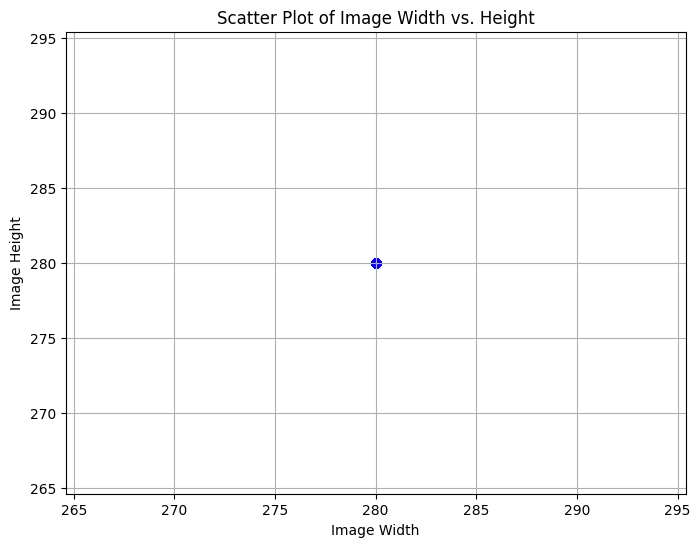

In [3]:
from PIL import Image

img_widths = []
img_height = []
img_list = []
img_paths = [] 
for category in os.listdir(img_dir):
    if category != ".DS_Store":# and category=="tanks":
        category_dir = os.path.join(img_dir, category)
        for img_id in os.listdir(category_dir):
            #print(category_dir+'/'+img_id)
            if img_id == ".DS_Store" :
                continue
            img_path = category_dir+'/'+img_id
            #print(img_path)
            img = Image.open(img_path)
            img_paths.append(img_path)
            img_list.append(img)
            #print(img.shape)
            img_widths.append(img.size[0])
            img_height.append(img.size[1])

plt.figure(figsize=(8, 6))
plt.scatter(img_widths, img_height, color='blue', alpha=0.5)

# Set labels and title
plt.xlabel('Image Width')
plt.ylabel('Image Height')
plt.title('Scatter Plot of Image Width vs. Height')

# Show plot
plt.grid(True)
plt.show()

In [4]:
import imagehash
dhash_list = [imagehash.dhash(img) for img in img_list]



In [5]:
threshold = 0
dup_image = []
for i in range(len(dhash_list)):
    for j in range(i, len(dhash_list)):
        if i == j:
            continue
        if abs(dhash_list[i]-dhash_list[j]) < threshold:
            print(f"image index {i}, {j} ")
            dup_image.append([i,j])

0


IndexError: list index out of range

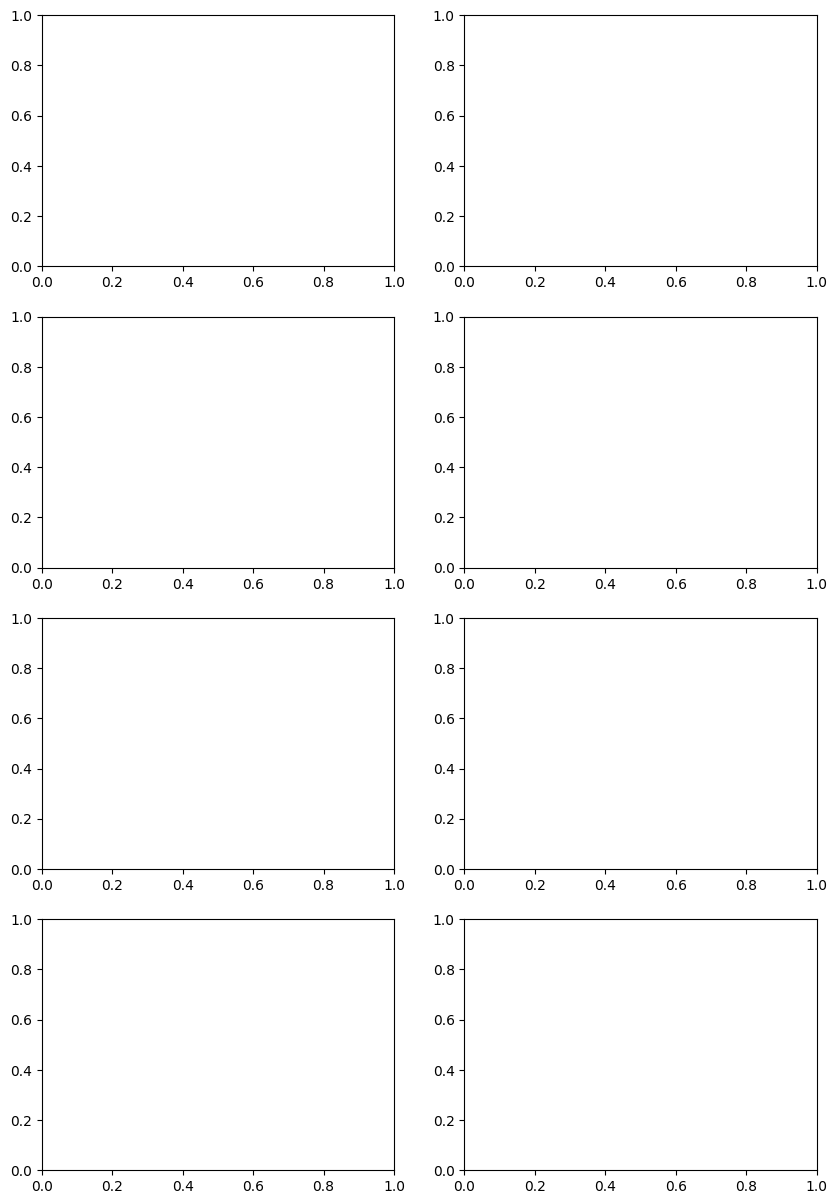

In [6]:
print(len(dup_image))
Nr = 4 
Nc = 2

fig, axs = plt.subplots(Nr, Nc, figsize=(10, 15))
for i in  range(Nr):
    axs[i][0].imshow(img_list[dup_image[i][0]])
    axs[i][0].axis('off')
    axs[i][1].imshow(img_list[dup_image[i][1]])
    axs[i][1].axis('off')
    print(f"img path: {img_paths[dup_image[i][0]]}, {img_paths[dup_image[i][1]]} ")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
data='coat is fucked up'
data_pd = pd.read_csv('/space/hotel/hieud/mlflow_aisia/img.csv')
data_new_pd = data_pd.loc[~data_pd['img_path'].isin([
    '/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET/cardigans/img_31687202.jpg', 
    '/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET/women_sweaters/img_31687202.jpg',
    '/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET/women_sweaters/img_31687287.jpg',
    '/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET/women_sweaters/img_31688584.jpg',
    '/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET/women_sweaters/img_31689106.jpg',
    '/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET/cardigans/img_42333857.jpg',
    '/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET/cardigans/img_42333885.jpg',
    '/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET/women_sweaters/img_42334521.jpg',
    '/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET/women_sweaters/img_42333885.jpg',
    '/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET/cardigans/img_44152414.jpg',
    '/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET/women_sweaters/img_44152414.jpg',
    '/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET/women_sweaters/img_45028984.jpg',
    '/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET/men_trousers/img_7352031.jpg',
    '/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET/men_trousers/img_57886900.jpg', 
    '/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET/men_trousers/img_58495490.jpg',
    '/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET/men_trousers/img_59404143.jpg',
    '/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET/men_sweaters/img_46642661.jpg',
    '/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET/men_sweaters/img_46642684.jpg',
    ])]
data_new_pd.to_csv('filter_image.csv', index=False)

In [ ]:
import pandas as pd

# Create a sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'C': ['aa', 'bb', 'c', 'd', 'e']
}

df = pd.DataFrame(data)

# Filter rows where column 'A' is greater than 3
#filtered_df = df[df['A'] isin  [3, 2, 1]]

# # Display the filtered DataFrame
# print("Filtered DataFrame where column 'A' > 3:")
# print(filtered_df)

# Filter rows where column 'C' is equal to 'c'
filtered_df_2 = df.loc[~df['C'].isin(['a', 'c'])]



filtered_df_2.head(5)

,A,C
0,1,aa
1,2,bb
3,4,d
4,5,e


In [ ]:
len(data_new_pd)

2709